In [13]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [14]:
symbol = 'S&P_500'
df = pd.read_csv(f'../datasets/{symbol}.csv')

In [15]:
def plot_feature_importance(model, X):
    features_name = X.columns.values
    y_pos = np.arange(len(features_name))

    _, ax = plt.subplots()

    ax.set_yticks(y_pos)
    ax.set_yticklabels(features_name)
    ax.barh(y_pos, model.feature_importances_);

In [16]:
y = df.trading_signal
X = df[['sma', 'macd', 'stochastic_k', 'stochastic_d', 'rsi', 'william_r']]
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25, shuffle = False, stratify = None)

MAE: 0.2185965682539541


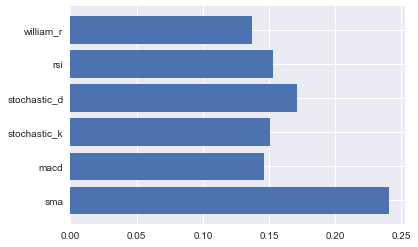

In [19]:
model = XGBRegressor(
    n_estimators = 100,
    colsample_bytree= 0.9,
    gamma= 0,
    learning_rate = 0.07,
    max_depth = 7,
    min_child_weight = 4,
    reg_alpha = 0.05,
    subsample = 0.8                                  
)
model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)

predictions = model.predict(test_X)
print(f"MAE: {mean_absolute_error(test_y, predictions)}")
plot_feature_importance(model, X)

In [20]:
padding = np.full(train_X.shape[0], np.nan)
prediction_trading_signal = np.concatenate((padding, predictions), axis=None)
df['p_t_s_xgboost'] = prediction_trading_signal
df.to_csv(f'../datasets/{symbol}.csv')

In [ ]:
parameters = {'n_estimators': [100, 500, 1000]}

xgb_grid = GridSearchCV(XGBRegressor(
    colsample_bytree= 0.9,
    gamma= 0,
    learning_rate = 0.07,
    max_depth = 7,
    min_child_weight = 4,
    objective = 'reg:linear',
    reg_alpha = 0.05,
    subsample = 0.8                                  
), parameters, cv = 2, n_jobs = 5, verbose=1)

xgb_grid.fit(train_X, train_y)

predictions = xgb_grid.predict(test_X)
print(f"MAE: {mean_absolute_error(test_y, predictions)}")
print(xgb_grid.best_score_, xgb_grid.best_params_)